In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/sample_data/StudentsPerformance.csv")

# Display first few rows
print(df.head())

# Check info and null values
print(df.info())
print(df.describe())
print(df.isnull().sum())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

In [ ]:
# Rename columns
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Check for missing values
print(df.isna().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)


gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
df["average_score"] = df[["math_score", "reading_score", "writing_score"]].mean(axis=1)


In [ ]:
print(df["average_score"].describe())


count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: average_score, dtype: float64


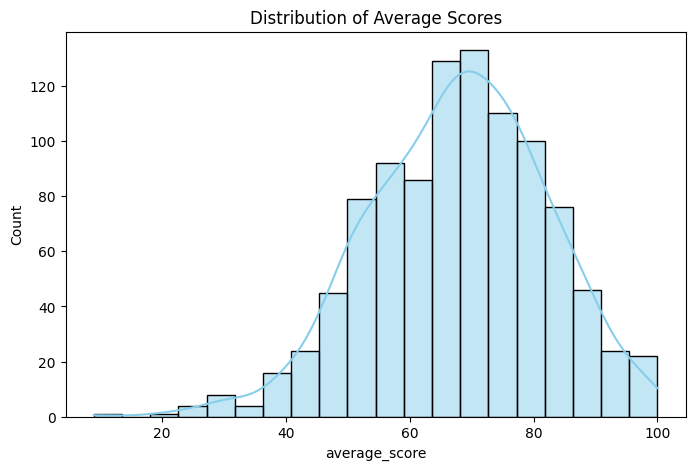

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["average_score"], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Average Scores")
plt.show()


/tmp/ipython-input-1273073491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="average_score", data=df, palette="Set2")


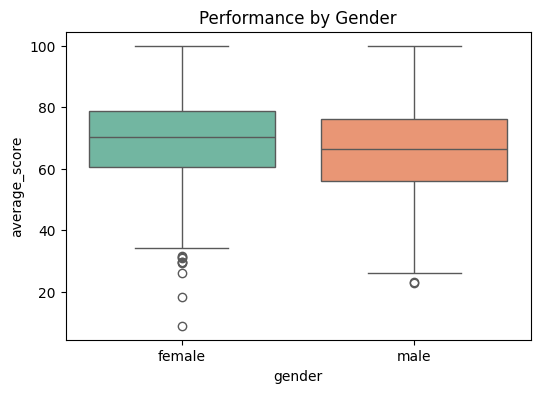

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="gender", y="average_score", data=df, palette="Set2")
plt.title("Performance by Gender")
plt.show()


/tmp/ipython-input-1683795381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="parental_level_of_education", y="average_score", data=df, palette="viridis")


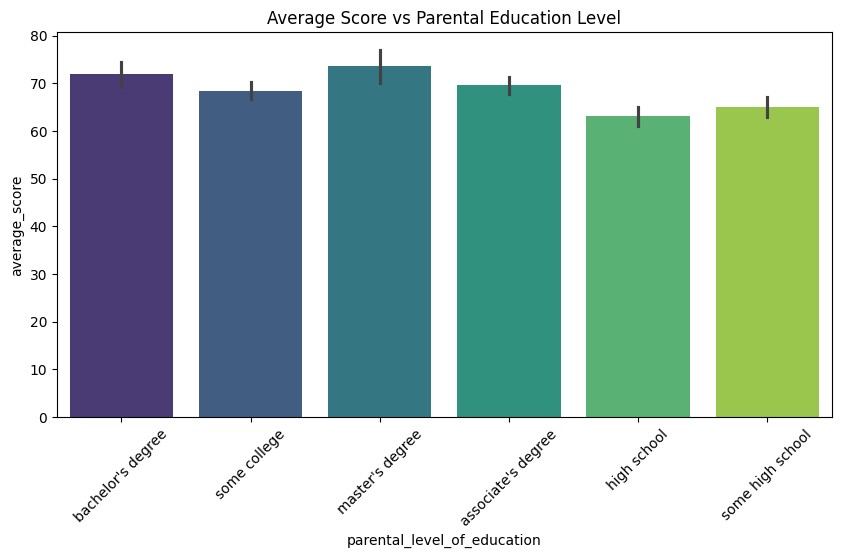

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="parental_level_of_education", y="average_score", data=df, palette="viridis")
plt.title("Average Score vs Parental Education Level")
plt.xticks(rotation=45)
plt.show()


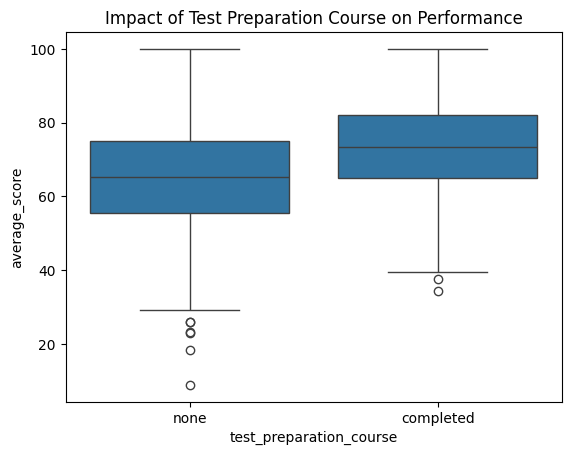

In [ ]:
sns.boxplot(x="test_preparation_course", y="average_score", data=df)
plt.title("Impact of Test Preparation Course on Performance")
plt.show()


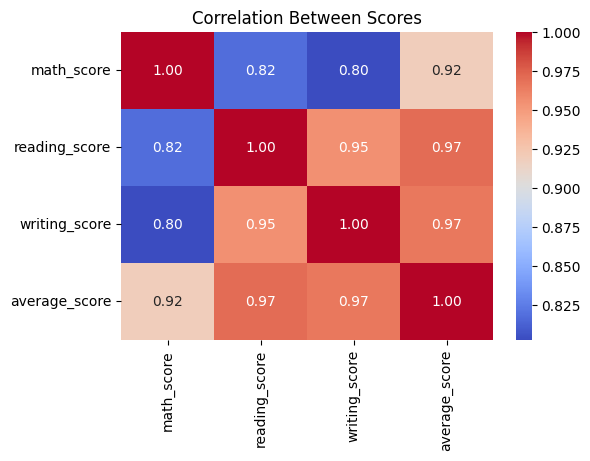

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Scores")
plt.show()


In [ ]:
df.to_csv("Cleaned_Student_Performance.csv", index=False)

In [ ]:
report = df.groupby("gender")[["math_score","reading_score","writing_score","average_score"]].mean()
print(report)


        math_score  reading_score  writing_score  average_score
gender                                                         
female   63.633205      72.608108      72.467181      69.569498
male     68.728216      65.473029      63.311203      65.837483


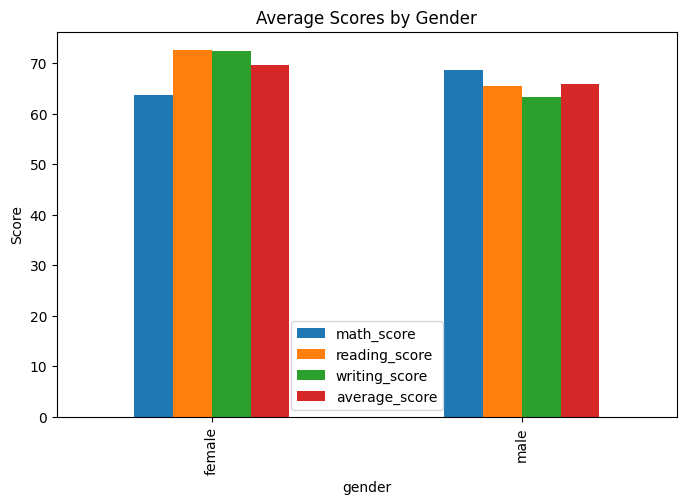

In [ ]:
report.plot(kind="bar", figsize=(8,5))
plt.title("Average Scores by Gender")
plt.ylabel("Score")
plt.show()
